# Data analysis and data visualizations

#### Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", 100)

%matplotlib inline

In [2]:
df = pd.read_csv('data/cleaned.csv')
df = df.drop('Unnamed: 0', axis=1)

This notebook will be formatted in the format specified below:

# 1. Format of the notebook

The notebook will be formatted in the format specified below.

#### Q : _The question_

#### *Plot which adresses the question.*

#### Conclusion : [...]

### As the observations where payment value was above 1000 are not representative of the whole population, we can drop these observations.

<AxesSubplot:xlabel='payment_value'>

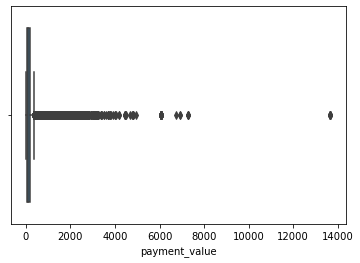

In [3]:
sns.boxplot(data=df, x='payment_value')

In [4]:
iqr = np.percentile(df.payment_value, (75,25))

percentile = iqr[0] - iqr[1]
percentile = iqr[0] + 1.5 * percentile
percentile

384.59000000000003

In [5]:
df = df.drop(df.loc[df.payment_value > percentile].index, axis=0)

<AxesSubplot:xlabel='payment_value'>

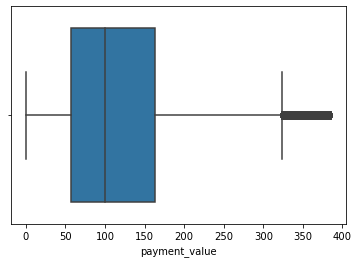

In [6]:
sns.boxplot(data=df, x='payment_value')

# 2. Questions on the dataset

### Q1 : How does the location of the seller affect the buyer?

In [7]:
df['Buyer_and_seller_same_state'] = df.seller_state == df.customer_state

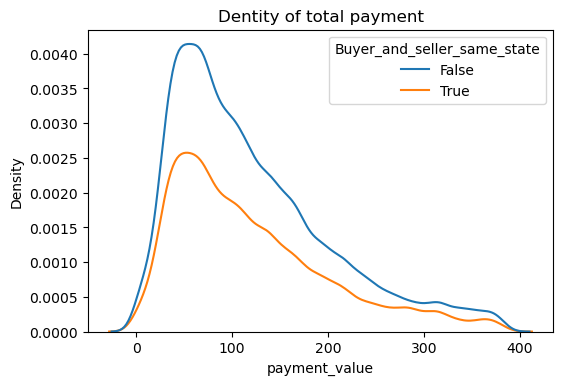

In [8]:
plt.figure(dpi=100)
ax = sns.kdeplot(hue='Buyer_and_seller_same_state', data=df, x='payment_value')
ax.set_title('Dentity of total payment');

### A1 : There is little to no specific connection between the location and the total payment.

### Q2 : How does the quantity of the photos affect the buyers choice and his later review score?

In [9]:
df['review_score'].value_counts()

5.0    72935
4.0    24839
1.0    15525
3.0    10811
2.0     4388
Name: review_score, dtype: int64

In [10]:
df = df.loc[df['product_photos_qty'] < 11]

<AxesSubplot:xlabel='product_photos_qty', ylabel='review_score'>

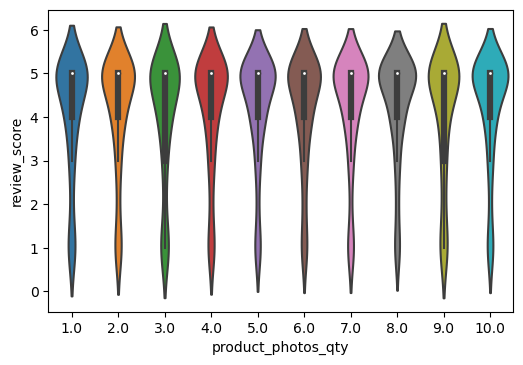

In [11]:
plt.figure(dpi=100)
sns.violinplot(data=df, x = 'product_photos_qty', y='review_score', dodge=True, bw=0.4)

<AxesSubplot:xlabel='product_photos_qty', ylabel='payment_value'>

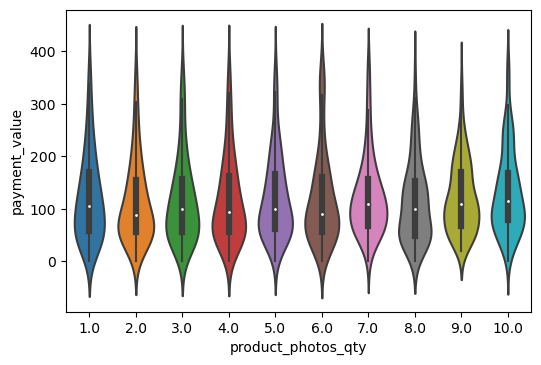

In [12]:
plt.figure(dpi=100)
sns.violinplot(data=df.loc[df['payment_value']<600], x = 'product_photos_qty', y='payment_value', dodge=True, bw=0.4)

### A2: The amount of the pictures doesn't really affect the customer. 

### Q3 : Is there any pattern between status of the order and the sellers location?

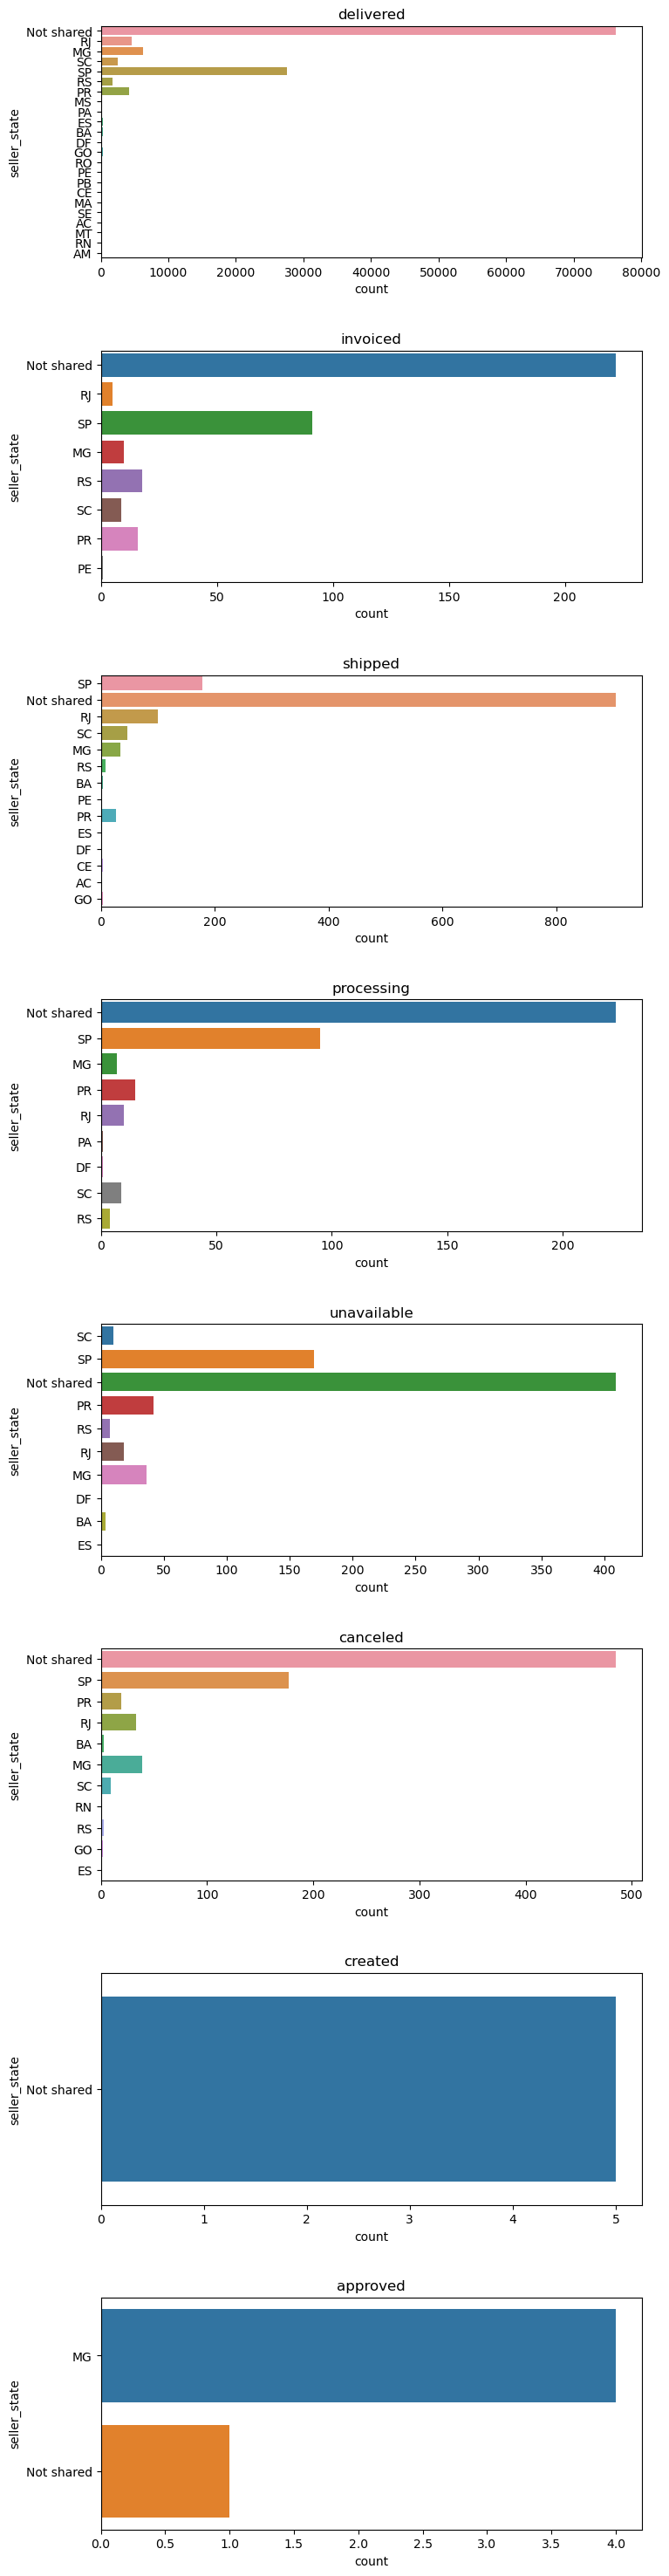

In [13]:
ord_status = df['order_status'].unique()
fig, axs = plt.subplots(dpi=100, nrows=len(ord_status), figsize=(8,38))
i = 0

for stat in ord_status:
    subset = df.loc[df['order_status']==stat]
    sns.countplot(data=subset, y='seller_state', ax = axs[i], )
    axs[i].set_title(stat)
    i += 1
fig.subplots_adjust(hspace=0.4)

### A3: What is interesting is the fact that in SP state, it seems as if there are problems in the products being unavailable, huge amount of orders being processed, and a big amount of orders being invoiced.

### Q4 : What is the most preferable payment type? Is there any pattern between the payment type and the value of that payment?\

In [14]:
df = df[df['payment_type'] != 'not_defined']

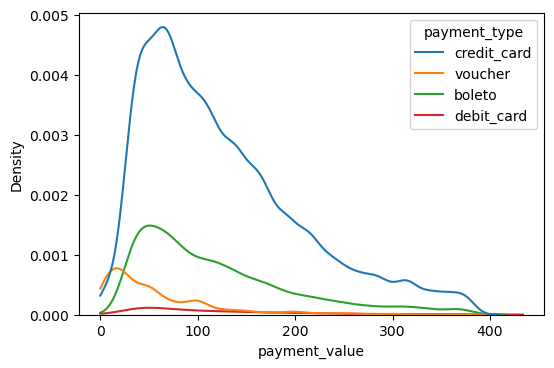

In [15]:
plt.figure(dpi=100)
sns.kdeplot(data=df, x='payment_value', hue='payment_type', clip=(0,1000));

### A4 : Based on the kdeplots, we can clearly see that the people who pay with credit cards, are the most numerous customers.

### Q5 : How does payment installments differ based on the buyers location?

<AxesSubplot:xlabel='payment_installments', ylabel='seller_state'>

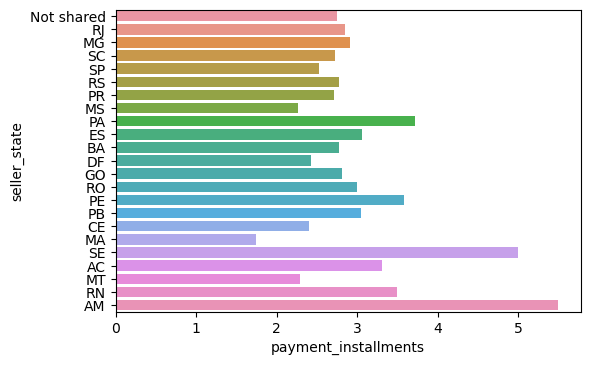

In [16]:
plt.figure(dpi=100)
sns.barplot(data=df, x='payment_installments', y='seller_state', ci=0)

### A5 : As we can see, people in AM tend to choose many more installments than people in other states. Opposite goes to MA with the smallest expected value.

### Q6 : Does the freight value impact the buyer?

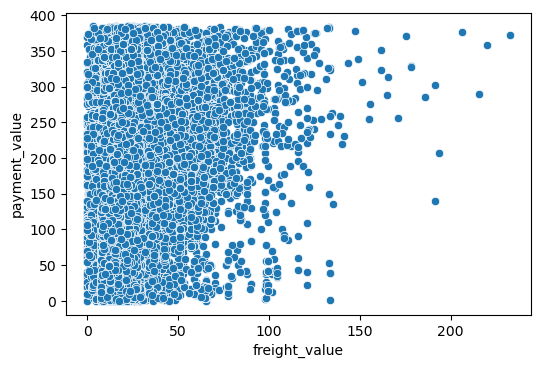

In [17]:
plt.figure(dpi=100)
sns.scatterplot(data=df, x='freight_value', y='payment_value');

### A6 : We can clearly see, that the bigger the freight value, the less people are interested in the product.